In [1]:
import os
import cv2
import random
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = os.path.join('..', 'data')

In [3]:
os.listdir(DATA_DIR)

['data.yaml', 'README.dataset.txt', 'README.roboflow.txt', 'test', 'train']

In [4]:
TEST_DIR = os.path.join(DATA_DIR, 'test')
TEST_DIR

'..\\data\\test'

In [5]:
IMAGES = os.listdir(os.path.join(TEST_DIR, 'images'))

In [6]:
IMAGES[:5]

['-I1-MS09uaqsLdGTFkgnS0Rcg1mmPyAj95ySg_eckoM_jpeg_jpg.rf.c0e910048c7e4984477365e8dcb6ccb2.jpg',
 '0ad90195-cd77-489e-bf85-08c83b80d3e0_jpg.rf.99450277941b6d2f9bedf26873fcc19a.jpg',
 '1125506397_15801322206131n_jpg.rf.9ef52afdeb57ca43db498140ad8fbb70.jpg',
 '1196686205_jpg_14_jpg.rf.9513daaeca364dfca45614a13a33c728.jpg',
 '1288788-une-employee-aide-des-voyageurs-en-provenance-de-chine-le-26-janvier-2020-a-l-aeroport-de-roissy_jpg.rf.128b24e9e1a2e28947ee58042fd4344b.jpg']

In [7]:
def get_random_data():
    filename = random.choice(IMAGES)[:-4]

    image = os.path.join(TEST_DIR, 'images', filename + '.jpg')
    label = os.path.join(TEST_DIR, 'labels', filename + '.txt')

    return image, label

In [8]:
def convert_yolo_coord(box):
    x, y, w, h = list(map(float, box))
    x1 = x - w / 2
    y1 = y - h / 2
    x2 = x + w / 2
    y2 = y + h / 2

    return x1, y1, x2, y2

In [9]:
def plot_image(image, boxes=[]):
    if len(boxes) == 0:
        return image

    for xmin, ymin, xmax, ymax in boxes:
        image = cv2.rectangle(
            image, 
            tuple(np.multiply([xmin, ymin], image.shape[0:2]).astype('int')), 
            tuple(np.multiply([xmax, ymax], image.shape[0:2]).astype('int')), 
            (0, 255, 0), 3)
    return image

In [10]:
model = YOLO('../train/weights/best.pt')

In [11]:
model.info()

YOLOv8n summary: 225 layers, 3011043 parameters, 0 gradients, 8.2 GFLOPs


(225, 3011043, 0, 8.1941504)

In [12]:
image, label = get_random_data()
image, label

('..\\data\\test\\images\\gravitate-faces_mp4-39_jpg.rf.c761663024c7b0d882e962b3bbad39e6.jpg',
 '..\\data\\test\\labels\\gravitate-faces_mp4-39_jpg.rf.c761663024c7b0d882e962b3bbad39e6.txt')


image 1/1 D:\Programming\Projects\Face Detection YOLOv8\notebook\..\data\test\images\mask-wearing-1632937831241_png_jpg.rf.6f4ccf01f7182575250f4539abd11898.jpg: 640x640 1 face, 452.0ms
Speed: 12.0ms preprocess, 452.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


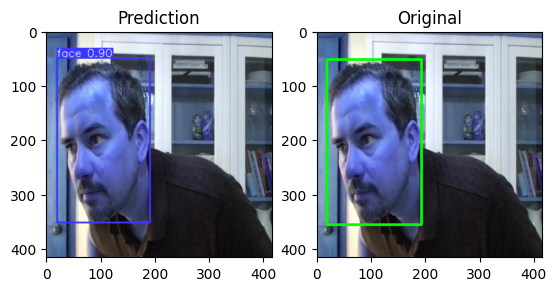


image 1/1 D:\Programming\Projects\Face Detection YOLOv8\notebook\..\data\test\images\Inside-merge_mov-30_jpg.rf.aebb3677711789f237507d3553afd056.jpg: 640x640 (no detections), 279.0ms
Speed: 26.0ms preprocess, 279.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


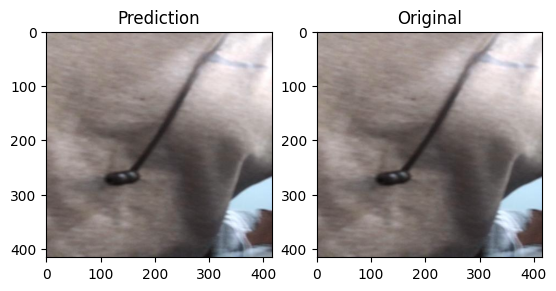


image 1/1 D:\Programming\Projects\Face Detection YOLOv8\notebook\..\data\test\images\Mohamed-Image-from-iOS_MOV-26_jpg.rf.b3e47eb2d711befe477b9c5374828d72.jpg: 640x640 1 face, 373.0ms
Speed: 7.0ms preprocess, 373.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


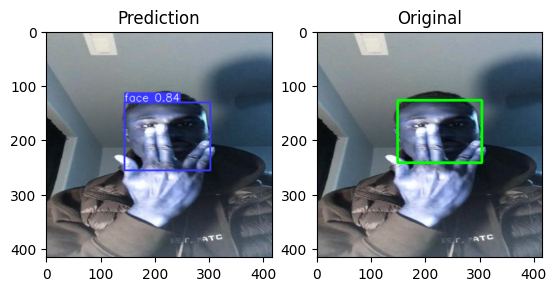


image 1/1 D:\Programming\Projects\Face Detection YOLOv8\notebook\..\data\test\images\mask-wearing-1632933579037_png_jpg.rf.2863f5486d196c5e0dc46457c68291be.jpg: 640x640 2 faces, 373.0ms
Speed: 10.0ms preprocess, 373.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


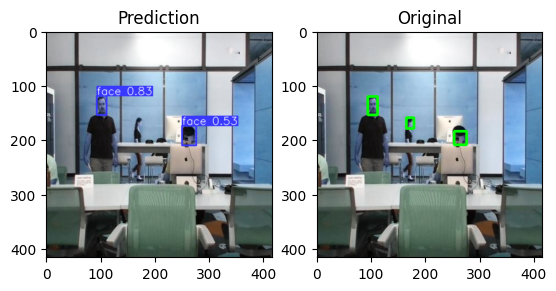

In [13]:
for i in range(4):
    image, label = get_random_data()
    image, label
    
    prediction = model(image)
    
    boxes = []
    image = cv2.imread(image)
    with open(label, 'r') as file:
        for line in file:
                box = line.strip().split(' ')[1:]
                boxes.append(convert_yolo_coord(box))
                image = plot_image(image, boxes)
        
    
    plt.subplot(1, 2, 1)
    plt.imshow(prediction[0].plot())
    plt.title('Prediction')
    
    plt.subplot(1, 2, 2)
    plt.imshow(image)
    plt.title('Original')
    
    plt.show()

In [14]:
video = cv2.VideoCapture(0)

while video.isOpened():
    ret, frame = video.read()
    
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    prediction = model(frame)
    
    cv2.imshow('frame', cv2.cvtColor(prediction[0].plot(), cv2.COLOR_RGB2BGR))
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video.release()
cv2.destroyAllWindows()


0: 480x640 1 face, 237.0ms
Speed: 7.0ms preprocess, 237.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 269.0ms
Speed: 5.0ms preprocess, 269.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 224.0ms
Speed: 4.0ms preprocess, 224.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 295.0ms
Speed: 4.0ms preprocess, 295.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 315.0ms
Speed: 5.0ms preprocess, 315.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 260.0ms
Speed: 9.0ms preprocess, 260.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 240.0ms
Speed: 5.0ms preprocess, 240.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 232.0ms
Speed: 7.0ms preprocess, 232.0ms inference, 2.0ms postprocess per image at shape (1, 3, 48